In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf
import cv2
# import tensorflow as tf
from keras.models import load_model
#from inception_model import model
# import os
import numpy as np
import random
from keras.layers import Flatten,Dense,Input,concatenate,Conv2D
from keras.models import Model
from keras.activations import sigmoid
from sklearn.model_selection import train_test_split

In [2]:
# physical_device = tf.config.list_physical_devices("CPU")

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
img_path = r'/home/uas-dtu/Desktop/cropped_original/images'

x = []
y = []

for folder in os.listdir(img_path):
    print("Loading",folder,"...")
    im_path = img_path +'/'+ folder
    for imgs in os.listdir(im_path):
        image = cv2.imread(im_path + '/' + imgs)
        image = cv2.resize(image,(150,200), interpolation = cv2.INTER_AREA)
        y.append(folder)
        x.append(image)
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

Loading Patrice_Chereau ...
Loading James_Wallack ...
Loading Gerald_Calabrese ...
Loading Jake_Gyllenhaal ...
Loading Joe_Paterno ...
Loading Cindy_Moll ...
Loading Brett_Hawke ...
Loading Miguel_Juarez_Perez ...
Loading Raja_Ibrahim ...
Loading Enrique_Iglesias ...
Loading Julia_Ormond ...
Loading Nate_Blackwell ...
Loading Saeed_Anwar ...
Loading William_Genego ...
Loading Rick_Bragg ...
Loading Will_Ofenheusle ...
Loading Jennette_Bradley ...
Loading Gustavo_Franco ...
Loading Bill_Duffey ...
Loading Sung_Hong_Choi ...
Loading James_Brazelton ...
Loading Dyana_Calub ...
Loading Doug_Wilson ...
Loading Alexa_Vega ...
Loading James_Layug ...
Loading Laszlo_Kovacs ...
Loading Jane_Fonda ...
Loading Laura_Pausini ...
Loading Win_Aung ...
Loading Elizabeth_Hurley ...
Loading Andrei_Konchalovsky ...
Loading Steve_Mariucci ...
Loading Michelle_Chiklis ...
Loading Helo_Pinheiro ...
Loading Martha_Smith ...
Loading Mark_Broxmeyer ...
Loading Afton_Smith ...
Loading Wilbert_Elki_Meza_Majino 

Loading Brandon_Lloyd ...
Loading Isabel_Orellana ...
Loading Yoon_Won-Sik ...
Loading Shane_Reynolds ...
Loading Moby ...
Loading Wayne_Ferreira ...
Loading Alicia_Molik ...
Loading Duncan_Fletcher ...
Loading Luke_Ridnour ...
Loading Tommy_Lewis ...
Loading Rose_Linkins ...
Loading Jessica_Simpson ...
Loading Paola_Espinoza ...
Loading Taylor_Twellman ...
Loading Armando_Carrillo ...
Loading Stella_Tennant ...
Loading Kate_Richardson ...
Loading Coco_dEste ...
Loading Alecos_Markides ...
Loading Brittany_Snow ...
Loading Emile_Lahoud ...
Loading Fabiola_Zuluaga ...
Loading Guus_Hiddink ...
Loading Robin_Williams ...
Loading Keanu_Reeves ...
Loading Blythe_Danner ...
Loading Heather_Whitestone_McCallum ...
Loading Nathalie_Baye ...
Loading Dave_McGinnis ...
Loading John_Williams ...
Loading Svetlana_Belousova ...
Loading Hassan_Wirajuda ...
Loading Margerry_Bakley ...
Loading James_McMahon ...
Loading Art_Hoffmann ...
Loading Derrick_Taylor ...
Loading Dominick_Dunne ...
Loading Russ_

Loading Jim_Zorn ...
Loading Curtis_Joseph ...
Loading Elaine_Chao ...
Loading Julie_Andrews ...
Loading Makiko_Tanaka ...
Loading Mike_Slive ...
Loading Aiysha_Smith ...
Loading John_Burnett ...
Loading Katja_Riemann ...
Loading Natanaela_Barnova ...
Loading Elizabeth_Berkeley ...
Loading Peter_Lundgren ...
Loading Prince_Rainier_III ...
Loading Nathan_Doudney ...
Loading Danis_Tanovic ...
Loading Taufik_Kiemas ...
Loading Kalpana_Chawla ...
Loading Mark_Lazarus ...
Loading Joseph_Ralston ...
Loading Kamel_Morjane ...
Loading Eric_Daze ...
Loading Bill_Nelson ...
Loading John_Perrota ...
Loading Eric_Vigouroux ...
Loading Fred_Wilpon ...
Loading Tony_Cummo ...
Loading Patricia_Hearst ...
Loading Marc-Andre_Fleury ...
Loading Maureen_Fanning ...
Loading Teresa_Heinz_Kerry ...
Loading Karen_Sharpe_Kramer ...
Loading Woodrow_Stanley ...
Loading Rafael_Bielsa ...
Loading Dan_Duquette ...
Loading Michael_Goldrich ...
Loading Alicia_Hollowell ...
Loading Jorge_Rodolfo_Canicoba_Corral ...
Lo

Loading Reggie_Lewis ...
Loading Mariah_Carey ...
Loading Helen_Alvare ...
Loading Ray_Allen ...
Loading Debra_Rose ...
Loading Wolfgang_Clement ...
Loading Georgina_Bardach ...
Loading Ben_Davis ...
Loading Guy_Hemmings ...
Loading Ronald_Ito ...
Loading Dirk_Kempthorne ...
Loading Hestrie_Cloette ...
Loading Enrique_Haroldo_Gorriaran_Merlo ...
Loading Rachel_Griffiths ...
Loading Mstislav_Rostropovich ...
Loading Atiabet_Ijan_Amabel ...
Loading Gavin_Degraw ...
Loading Oleg_Romantsev ...
Loading Tom_OBrien ...
Loading Paul_Tagliabue ...
Loading Roberto_Marinho ...
Loading Albrecht_Mentz ...
Loading Sue_Slavec ...
Loading Carlos_Mesa ...
Loading Bobby_Robson ...
Loading Marina_Silva ...
Loading Carl_Reiner ...
Loading Mary_Jo_Myers ...
Loading Ivan_Lee ...
Loading Ana_Guevara ...
Loading Frank_Griswold ...
Loading Juan_Jose_Lucas ...
Loading Mariana_Gonzalez ...
Loading Peter_Arnett ...
Loading Juergen_Schrempp ...
Loading Brandon_Robinson ...
Loading Michael_Fitzgerald ...
Loading Hu

Loading Eve_Pelletier ...
Loading Franck_Cerutti ...
Loading Molly_Sims ...
Loading Billy_Donovan ...
Loading Martin_Brodeur ...
Loading Leonardo_Del_Vecchio ...
Loading Jens_Lehmann ...
Loading Guangdong_Ou_Guangyuan ...
Loading Chick_Hearn ...
Loading Steny_Hoyer ...
Loading Lynne_Thigpen ...
Loading Edward_Johnson ...
Loading Terry_Semel ...
Loading Andrew_Jarecki ...
Loading Charley_Armey ...
Loading Marcus_Allen ...
Loading Odilia_Collazo ...
Loading Aly_Wagner ...
Loading Walter_Woods ...
Loading Clive_Lloyd ...
Loading Nasser_al-Kidwa ...
Loading Yukio_Hatoyama ...
Loading Wim_Duisenberg ...
Loading Crandall_Bowles ...
Loading Miguel_Cotto ...
Loading Fernando_Gonzalez ...
Loading Ramon_Santana ...
Loading Danny_Morgan ...
Loading Ismail_Abu_Shanab ...
Loading Melissa_Joan_Hart ...
Loading Frank_Hsieh ...
Loading William_Hochul ...
Loading Kurt_Budke ...
Loading Ellen_Martin ...
Loading Gianni_Agnelli ...
Loading Jim_Fassel ...
Loading Chris_Claiborne ...
Loading Daniel_Osorno .

Loading Meirion_Evans ...
Loading Ali_Adbul_Karim_Madani ...
Loading Larry_Hahn ...
Loading Andrew_Caldecott ...
Loading Alfonso_Soriano ...
Loading Mark_Shapiro ...
Loading Lazaro_Castro ...
Loading Raag_Singhal ...
Loading Robert_Stack ...
Loading Chanda_Rubin ...
Loading John_Barnett ...
Loading John_Duprey ...
Loading Julie_Goodenough ...
Loading Chang_Jae_On ...
Loading Jack_Smith ...
Loading Tyler_Hamilton ...
Loading Eric_Wedge ...
Loading Heidi_Fleiss ...
Loading Emma_Watson ...
Loading Dustan_Mohr ...
Loading David_Myers ...
Loading Mario_Lemieux ...
Loading Mikhail_Kalashnikov ...
Loading DAngelo_Jimenez ...
Loading Jean-Patrick_Nazon ...
Loading Jim_Spinoza ...
Loading Nur_Jaafar ...
Loading Matt_Anderson ...
Loading Colin_Jackson ...
Loading Kevin_Stallings ...
Loading Eddie_Sutton ...
Loading Adam_Scott ...
Loading Jane_Riley ...
Loading Madeleine_Albright ...
Loading Lin_Yi-fu ...
Loading Earl_Campbell ...
Loading Michael_Moore ...
Loading Ghassan_Elashi ...
Loading Brad_

Loading Griffin_Colvin ...
Loading Alison_Lohman ...
Loading Eli_Broad ...
Loading Skip_Prosser ...
Loading Keith_Foulke ...
Loading Idi_Amin ...
Loading Retief_Goosen ...
Loading Jan_Ullrich ...
Loading Theresa_Gattung ...
Loading Gerald_Barbarito ...
Loading Queen_Sofia ...
Loading John_Kerry ...
Loading Ham_Pong-sil ...
Loading Leni_Bjorklund ...
Loading Ken_Wharfe ...
Loading Nick_Nolte ...
Loading Marcelo_Salas ...
Loading Paul_Reiser ...
Loading Roger_Corbett ...
Loading James_Franco ...
Loading Scott_Peterson ...
Loading Keith_Olbermann ...
Loading John_Richardson ...
Loading Agnes_Bruckner ...
Loading Andre_Smith ...
Loading Rick_Romley ...
Loading Kathleen_Kennedy_Townsend ...
Loading Kurt_Tanabe ...
Loading Momcilo_Perisic ...
Loading Martha_Bowen ...
Loading John_Wright ...
Loading Brian_Jordan ...
Loading Dianne_Reeves ...
Loading David_McKiernan ...
Loading Claudio_Abbado ...
Loading Casey_Mears ...
Loading Ray_Morrough ...
Loading Lisa_Ling ...
Loading Evo_Morales ...
Loa

Loading Sharon_Frey ...
Loading James_Morris ...
Loading Craig_Fitzgibbon ...
Loading Hans_Peter_Briegel ...
Loading Clifford_Robinson ...
Loading Larry_Harris ...
Loading Goran_Zivkovic ...
Loading Justin_Timberlake ...
Loading Christine_Gregoire ...
Loading Stepan_Demirchian ...
Loading Julie_Taymor ...
Loading Askar_Akayev ...
Loading LeBron_James ...
Loading Izzat_Ibrahim ...
Loading Lemuel_Montulo ...
Loading Cecilia_Chang ...
Loading Mel_Brooks ...
Loading Cathy_Chisholm ...
Loading Tony_Elias ...
Loading Duane_Lee_Chapman ...
Loading Gary_Winnick ...
Loading Richard_Cohen ...
Loading Dennis_Archer ...
Loading Deepa_Mehta ...
Loading Arthur_Johnson ...
Loading John_Tyson ...
Loading Rolandas_Paksas ...
Loading Mario_Cipollini ...
Loading Meg_Mallon ...
Loading Ornella_Muti ...
Loading Vincent_Sombrotto ...
Loading Margaret_Hoelzer ...
Loading John_Timoney ...
Loading Jesse_Ventura ...
Loading Michael_Kors ...
Loading Craig_MacTavish ...
Loading Eric_Shinseki ...
Loading Patricia_

Loading Michael_Kostelnik ...
Loading Heinz_Feldmann ...
Loading Peter_Care ...
Loading Cynthia_Rowley ...
Loading Mario_Puzo ...
Loading Pinar_del_Rio ...
Loading Gary_Paer ...
Loading Ron_Kirk ...
Loading Marat_Safin ...
Loading Diane_Ladd ...
Loading Doug_Melvin ...
Loading Dorothy_Lamour ...
Loading Dorothy_Wilson ...
Loading Mikhail_Khodorkovsky ...
Loading Yingfan_Wang ...
Loading Geno_Auriemma ...
Loading Jeane_Kirkpatrick ...
Loading Aparna_Pillai ...
Loading Theodore_Tweed_Roosevelt ...
Loading Peter_Caruana ...
Loading David_Tornberg ...
Loading Scott_Rolen ...
Loading Stephanie_Cohen_Aloro ...
Loading Mary_Carey ...
Loading Michael_Piuze ...
Loading Eliane_Karp ...
Loading James_Kopp ...
Loading Patrick_Bourrat ...
Loading Jose_Rosado ...
Loading Li_Ruihuan ...
Loading Victoria_Clarke ...
Loading Miroljub ...
Loading James_Watt ...
Loading Don_Henley ...
Loading Judith_Nathan ...
Loading Brian_Wells ...
Loading Kelvin_Sampson ...
Loading Elena_Likhovtseva ...
Loading Eladio_

Loading Hal_Sellers ...
Loading Mark_Hogan ...
Loading Sergei_Ivanov ...
Loading Sue_Guevara ...
Loading Bruce_Willis ...
Loading Martin_Cauchon ...
Loading Steve_Fehr ...
Loading Isidro_Pastor ...
Loading Santiago_Botero ...
Loading Christian_Lirette ...
Loading Laurent_Gbagbo ...
Loading Sananda_Maitreya ...
Loading Shigeo_Nagashima ...
Loading Michel_Kratochvil ...
Loading Anthony_Mazur ...
Loading Peter_Ueberroth ...
Loading David_Leahy ...
Loading Damon_van_Dam ...
Loading John_Daly_Jr ...
Loading Rick_Husband ...
Loading James_Dingemans ...
Loading Candace_Sutton ...
Loading Kevin_Satterfield ...
Loading Kate_Moss ...
Loading Roy_Jones_Jr ...
Loading Raf_Vallone ...
Loading Queen_Elizabeth_II ...
Loading Beyonce_Knowles ...
Loading Cyndi_Thompson ...
Loading Shafal_Mosed ...
Loading Larry_Eustachy ...
Loading Jeb_Bush ...
Loading Jason_Priestley ...
Loading Evie_Lazarou ...
Loading Joe_Strummer ...
Loading Olesya_Bonabarenko ...
Loading Eddie_Lucio ...
Loading Raul_Ibanez ...
Loa

Loading San_Lan ...
Loading Bob_Krueger ...
Loading Noer_Muis ...
Loading Jose_Luis_Santiago_Vasconcelos ...
Loading Marricia_Tate ...
Loading Ian_Knop ...
Loading Sandra_Ceccarelli ...
Loading David_Wells ...
Loading Charlton_Heston ...
Loading Jason_Keep ...
Loading Natalie_Imbruglia ...
Loading Michael_Capellas ...
Loading Eriko_Tamura ...
Loading Connie_Chung ...
Loading Luo_Linquan ...
Loading Roland_Koch ...
Loading Ed_Sullivan ...
Loading Laura_Schlessinger ...
Loading Gerhard_Boekel ...
Loading Vincent_Cianci_Jr ...
Loading Madge_Overhouse ...
Loading Mike_Maroth ...
Loading Richie_Adubato ...
Loading Sue_Grafton ...
Loading Kent_Robinson ...
Loading Franz_Gsell ...
Loading Ahmed_Ahmed ...
Loading Brian_Pavlich ...
Loading Gabriella_Bo ...
Loading Anthony_Rackauckas ...
Loading Robert_McKee ...
Loading Wolfgang_Schuessel ...
Loading Colleen_Atwood ...
Loading Nastassia_Kinski ...
Loading Eric_Schacht ...
Loading David_Kelley ...
Loading Michael_Denzel ...
Loading Bob_Ferguson .

Loading Emmanuel_Filiberto ...
Loading Miguel_Jimenez ...
Loading Ibrahim_Al-Marashi ...
Loading Colleen_Jones ...
Loading Martin_Keown ...
Loading Betty_Williams ...
Loading Desiree_Lemosi ...
Loading Valentina_Tereshkova ...
Loading Darcy_Regier ...
Loading Jerry_Tarkanian ...
Loading William_Macy ...
Loading Gilberto_Rodriguez_Orejuela ...
Loading Steve_Cox ...
Loading Amy_Smart ...
Loading Barry_Zito ...
Loading Ronnie_Jagday ...
Loading Jonathan_Mostow ...
Loading Chris_Thomas ...
Loading Benito_Santiago ...
Loading Michelle_Branch ...
Loading Francisco_Urenda ...
Loading Irina_Lobacheva ...
Loading Prem_Kumar_Nair ...
Loading Tracy_McGrady ...
Loading Raghad_Saddam_Hussein ...
Loading John_Burkett ...
Loading Javier_Vazquez ...
Loading Daniele_Hypolito ...
Loading Huang_Suey-Sheng ...
Loading Ray_Price ...
Loading William_Morrow ...
Loading Owen_Nolan ...
Loading Rainer_Geulen ...
Loading Eric_Taino ...
Loading Fabricio_Oberto ...
Loading Jim_Abbott ...
Loading Karin_Pilsaeter ..

Loading Phil_Donahue ...
Loading Lennart_Johansson ...
Loading Michael_Andretti ...
Loading Howard_Schultz ...
Loading Vernon_Forrest ...
Loading Bing_Crosby ...
Loading Namuddu_Florence ...
Loading Roger_Machado ...
Loading Otto_Reich ...
Loading Jose_Dirceu ...
Loading Federico_Fellini ...
Loading Allen_Iverson ...
Loading Kaio_Almeida ...
Loading Guy_Ritchie ...
Loading Micky_Arison ...
Loading Alberto_Sordi ...
Loading Charlotte_Chambers ...
Loading Tina_Sinatra ...
Loading Sanjay_Gupta ...
Loading Alberto_Gonzales ...
Loading Ed_Book ...
Loading Shoshannah_Stern ...
Loading Katerina_Smrzova ...
Loading Martin_Sheen ...
Loading Michael_Kahn ...
Loading Wanda_de_la_Jesus ...
Loading Taku_Yamasaki ...
Loading Kim_Gandy ...
Loading Jada_Pinkett_Smith ...
Loading Maria_Garcia ...
Loading Thomas_Malchow ...
Loading Arnaud_Lagardere ...
Loading Tonya_Payne ...
Loading Michael_Hagee ...
Loading John_Salazar ...
Loading Deb_Santos ...
Loading Paul_Newman ...
Loading Peter_Goldmark ...
Load

(7521, 200, 150, 3)
(7521,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(6016, 200, 150, 3)
(6016,)


In [6]:
for i in x_train:
    print(i.shape)

(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 

(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 150, 3)
(200, 

In [7]:
# x_train = np.expand_dims(x_train,axis=3)
# x_test = np.expand_dims(x_train,axis=3)
# print(x_train.shape)

In [304]:
def create_batch(batch_size):
    x_anchors = np.zeros((batch_size,200,150,3))
    x_positives = np.zeros((batch_size,200,150,3))
    x_negatives = np.zeros((batch_size,200,150,3))

    for i in range(0, batch_size):

        random_index = random.randint(0, x_train.shape[0] - 1)
        x_anchor = x_train[random_index]
        index = y_train[random_index]
        print("where",np.where(y_train == index),np.where(y_train != index))
        if len(np.where(y_train == index)[0]) != 1:
            indices_for_pos = np.squeeze(np.where(y_train == index))
        else:
            indices_for_pos = np.where(y_train == index) 
        if len(np.where(y_train == index)[0]) != 1:
            indices_for_neg = np.squeeze(np.where(y_train != index))
        else:
            indices_for_neg = np.where(y_train != index)
        print("indices",indices_for_pos,indices_for_neg)
        print("indices0",indices_for_pos[0],indices_for_neg[0])
        x_positive = x_train[indices_for_pos[0][random.randint(0, len(indices_for_pos[0]) - 1)]]
        x_negative = x_train[indices_for_neg[0][random.randint(0, len(indices_for_neg[0]) - 1)]]
        print("i",x_positive.shape, x_negative.shape)
        x_anchors[i] = x_anchor
        x_positives[i] = x_positive
        x_negatives[i] = x_negative

    return [x_anchors, x_positives, x_negatives]


In [305]:
emb_size = 64

m = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(200,150,3),
    pooling=None,
    classes=10,
)

m.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_129 (InputLayer)          [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_64 (ZeroPadding2 (None, 206, 156, 3)  0           input_129[0][0]                  
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 100, 75, 64)  9408        zero_padding2d_64[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 100, 75, 64)  256         conv1/conv[0][0]                 
________________________________________________________________________________________

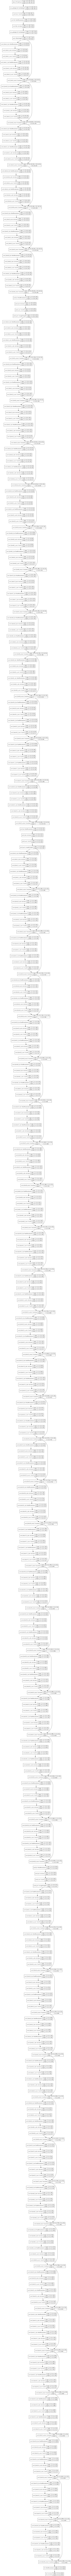

In [306]:
from tensorflow.keras.utils import plot_model
plot_model(m, show_shapes=1)

In [307]:
#i = Input(shape=(200,150,3))
#r = tf.keras.layers.experimental.preprocessing.Resizing(96,96)(i)
#print(r.shape)
#conv2d = Conv2D(3,(1,1),activation='relu')(r)
#m = m(conv2d)

flatten = m.output
flatten = Flatten()(flatten)
embmodel = Dense(64, activation="relu")(flatten)
embmodel = Dense(emb_size, activation='sigmoid')(embmodel)

embmodel = Model(inputs=m.input, outputs=embmodel)
embmodel.summary()

Model: "functional_127"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_129 (InputLayer)          [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_64 (ZeroPadding2 (None, 206, 156, 3)  0           input_129[0][0]                  
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 100, 75, 64)  9408        zero_padding2d_64[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 100, 75, 64)  256         conv1/conv[0][0]                 
_____________________________________________________________________________________

In [308]:
input_anchor = Input(shape=(200,150,3))
input_positive = Input(shape=(200,150,3))
input_negative = Input(shape=(200,150,3))

embedding_anchor = embmodel(input_anchor)
embedding_positive = embmodel(input_positive)
embedding_negative = embmodel(input_negative)

output = concatenate([embedding_anchor, embedding_positive, embedding_negative], axis=1)

net = Model([input_anchor, input_positive, input_negative], output)
net.summary()

Model: "functional_129"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_130 (InputLayer)          [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
input_131 (InputLayer)          [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
input_132 (InputLayer)          [(None, 200, 150, 3) 0                                            
__________________________________________________________________________________________________
functional_127 (Functional)     (None, 64)           8614592     input_130[0][0]                  
                                                                 input_131[0][0]     

In [309]:
alpha = 0.2

def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
    return tf.maximum(positive_dist - negative_dist + alpha, 0.)

In [310]:
def data_generator(batch_size):
    while True:
        x = create_batch(batch_size)
        y = np.zeros((batch_size, 3*emb_size))
        yield x, y

In [311]:
net.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])

data_path = r'/home/uas-dtu/Desktop/cropped_original'
save_path = os.path.join(data_path, "model_weights_triplet_loss_2048.h5")

In [315]:
batch_size = 32
epochs = 50
steps_per_epoch = 100

model_history = net.fit(
    data_generator(batch_size),
    epochs=epochs, steps_per_epoch=steps_per_epoch,
    verbose=1
)

where (array([5361]),) (array([   0,    1,    2, ..., 6013, 6014, 6015]),)
indices (array([5361]),) (array([   0,    1,    2, ..., 6013, 6014, 6015]),)
indices0 [5361] [   0    1    2 ... 6013 6014 6015]
i (200, 150, 3) (200, 150, 3)
where (array([385]),) (array([   0,    1,    2, ..., 6013, 6014, 6015]),)
indices (array([385]),) (array([   0,    1,    2, ..., 6013, 6014, 6015]),)
indices0 [385] [   0    1    2 ... 6013 6014 6015]
i (200, 150, 3) (200, 150, 3)
where (array([5243]),) (array([   0,    1,    2, ..., 6013, 6014, 6015]),)
indices (array([5243]),) (array([   0,    1,    2, ..., 6013, 6014, 6015]),)
indices0 [5243] [   0    1    2 ... 6013 6014 6015]
i (200, 150, 3) (200, 150, 3)
where (array([ 420, 4624, 5076, 5749]),) (array([   0,    1,    2, ..., 6013, 6014, 6015]),)
indices [ 420 4624 5076 5749] [   0    1    2 ... 6013 6014 6015]
indices0 420 0


TypeError: object of type 'numpy.int64' has no len()

In [314]:
net.save_weights(save_path)

In [ ]:
test_sample = 1000
nway_min = 5
nway_max = 25
train_acc = []
nway_list = []
for nway in range(nway_min, nway_max+1,5):
  print("Checking %d way accuracy...." % nway)
  correct_count = 0
  for _ in range(test_sample):
    # Retrieving nway number of triplets and calculating embedding vector
    nway_anchor, nway_positive, _ = create_batch(nway)
    nway_anchor_embedding = net.predict(nway_anchor)
    sample_index = random.randint(0,nway-1)
    sample_embedding = net.predict(np.expand_dims(nway_positive[sample_index], axis=0))
    # print(sample_index, nway_anchor_embedding.shape, sample_embedding.shape)
    distance = tf.sqrt(tf.reduce_sum(tf.pow(nway_anchor_embedding - sample_embedding, 2), 1, keepdims=True)).numpy()
    if np.argmin(distance) == sample_index:
      correct_count+=1
  nway_list.append(nway)
  acc = (correct_count/test_sample)*100.
  train_acc.append(acc)
  print("Accuracy %.2f" % acc)
